## Example 1

Evaluate the integral of $f(x) = x^4 - 2x^3 + 1$ on the interval $[0, 2]$: first symbolically, and then numerically using the trapezoidal rule.

Note, we can evaluate the integral symbolically as long as the function has an analytical expression that SymPy (or Maple, Mathematica, Wolfram Alpha...) knows how to solve. Otherwise, numerical integration is required.

In [7]:
from sympy import * # the symbolic math package
import numpy as np

def f(x):
    return x**4 - 2*x**3 + 1

a = 0.0  # beginning of interval
b = 2.0  # end of interval

In [2]:
# symbolic integration
xs = Symbol('xs', real=True)  # the variable of integration
integrate(f(xs), (xs, a, b))

0.400000000000000

by trapezoidal rule

In [8]:
def trapezoidal_rule(a, b, n): #def trapezoid
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h/2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])
    return integral

a = 0 #def intervals and Number of subdivisions
b = 2
n = 100  

In [11]:
result = trapezoidal_rule(a, b, n)
print(result)

0.400266656


## Example 2

Let's have a look at Newman's gaussxw and gausswab code. Recall: 
* Use `gaussxw` for integration limits from $-1$ to $+1$,
* Use `gaussxwab` for integration limits from $a$ to $b$.
* Since the calculation of weights and points is expensive, use `gaussxw.py` if you are going to change the limits repeatedly (see textbook pages 167-168 for how).

In [13]:
# %load gaussxw
from pylab import *
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

Reproduce Newman's Figure 5.4 with the help of the above code.

In [15]:
from numpy.polynomial.legendre import leggauss

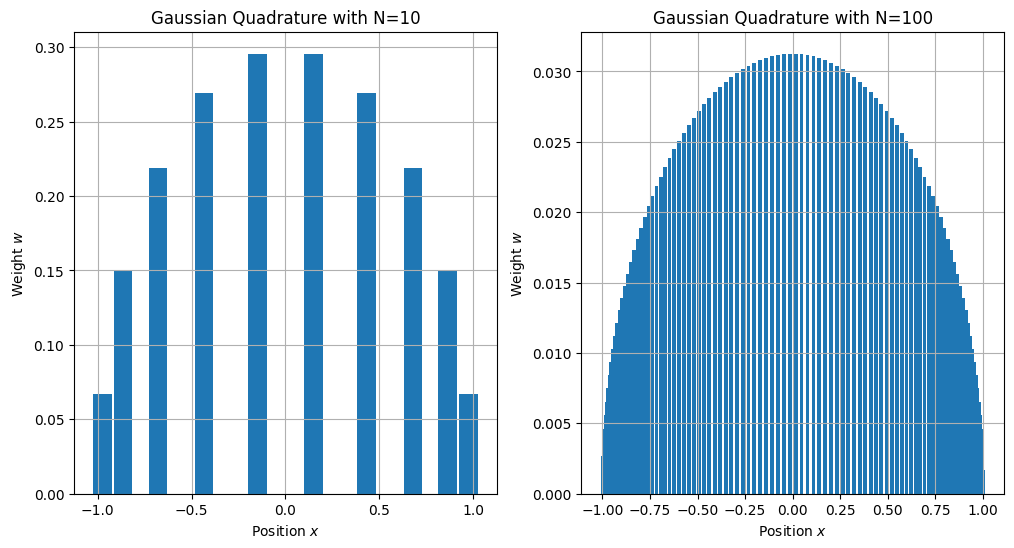

In [22]:
N_values = [10, 100]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for idx, N in enumerate(N_values):
    x, w = gaussxw(N)  # positions (x) and weights (w) for Gaussian quadrature
    
    # Plotting
    axs[idx].bar(x, w, width=0.02 if N == 100 else 0.1, align='center')
    axs[idx].set_xlabel('Position $x$')
    axs[idx].set_ylabel('Weight $w$')
    axs[idx].set_title(f'Gaussian Quadrature with N={N}')
    axs[idx].grid(True)

# Display the plot
plt.show()

![](gauss.PNG)

## Example 3

Compute $\displaystyle \int_{-1}^{1} \left[x^4 + \sin(x^2)\right]dx$ : first symbolically, and then using Gaussian quadrature.

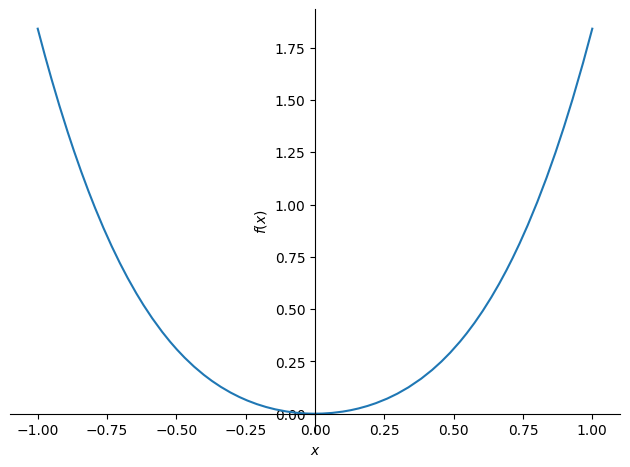

In [4]:
# first, plot the function using symbolic math package
from sympy import * 
init_printing()
x = symbols('x', real=True)
f = x**4 + sin(x**2)
plotting.plot(f, (x, -1, 1))

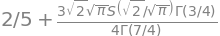

In [5]:
# integrate using symbolic math package
res=integrate(f, (x, -1, +1))
res

In [6]:
# Numerical evaluation
N(res)

By Gaussian quadrature

In [24]:
#from newman pg170
def f(x):
    return x**4 + sin(x**2)
N=50 
a= -1.0 
b =1.0

#finding pos and weight
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w


s =0.0
for k in range(N):
    s += wp[k]*f(xp[k]) 
print(s)

1.0205366034467604
